Predicting Weather based on Music Listening Patterns

In [60]:
import pandas as pd
dataset_spotify = pd.read_csv('apiData.csv', header=0)
dataset_weather_alexandria = pd.read_csv('alexandria.csv', header=0)
dataset_weather = dataset_weather_alexandria[['date', 'precipcover', 'conditions']]

In [61]:
merged_dataset = dataset_spotify.merge(dataset_weather, on='date',)
#merged_dataset.to_csv('./cleaned_data/merged.csv', index=False)
display(merged_dataset)

,Year,Month,Day,time,trackName,albumName,artistName,playlists.name,track_id,date,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,precipcover,conditions
0,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,0.00,Partially cloudy
1,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,41.67,"Rain, Overcast"
2,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,0.00,Partially cloudy
3,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,41.67,"Rain, Overcast"
4,2023,6,22,10:09:00,Do I Wanna Know?,AM,Arctic Monkeys,Me and michael,5FVd6KXrgO9B3JPmC8OPst,6/22/2023,...,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4,0.00,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023,6,19,17:29:00,Welcome to the Black Parade,The Black Parade,My Chemical Romance,Missing Her,5wQnmLuC1W7ATsArWACrgW,6/19/2023,...,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4,4.17,"Rain, Partially cloudy"
1990,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,0.00,Clear
1991,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,0.00,Partially cloudy
1992,2023,7,30,05:30:00,Les pensées,Foundations,The Architect,Missing Her,0fira69E5qwYJNSvzEOCs7,7/30/2023,...,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4,0.00,Clear


Merge the 2 datasets togeth based on the date key

In [62]:
def binary_precipitation(value):
    if value != 1 and value != 3:
        return 1
    else:
        return 0



Function to convert all values from conditions to a binary "Was it raining".

In [63]:
def enumerate_conditions(conditions):
   condition_mapping = {condition: index for index, condition in enumerate(set(conditions))}
   enumerated_data = [condition_mapping[condition] for condition in conditions]
   return enumerated_data

Function to enumerate the weather conditions into numeric values. For example, Clear becomes 0 and Rain becomes 4.

In [64]:
merged_dataset['conditionsEnum'] = enumerate_conditions(merged_dataset['conditions'])
merged_dataset['conditionsBinary'] = merged_dataset['conditionsEnum'].apply(binary_precipitation)
display(merged_dataset[['conditionsEnum','conditionsBinary']])

,conditionsEnum,conditionsBinary
0,0,1
1,4,1
2,0,1
3,4,1
4,0,1
...,...,...
1989,2,1
1990,3,0
1991,0,1
1992,3,0


In [65]:
unique_conditions_key = merged_dataset[['conditions', 'conditionsEnum']].drop_duplicates()
unique_conditions_key = unique_conditions_key.sort_values(by='conditionsEnum')
display(unique_conditions_key)

,conditions,conditionsEnum
0,Partially cloudy,0
1330,Overcast,1
9,"Rain, Partially cloudy",2
8,Clear,3
1,"Rain, Overcast",4


Display the legend and dataframe for the eunumerate conditions of the weather.

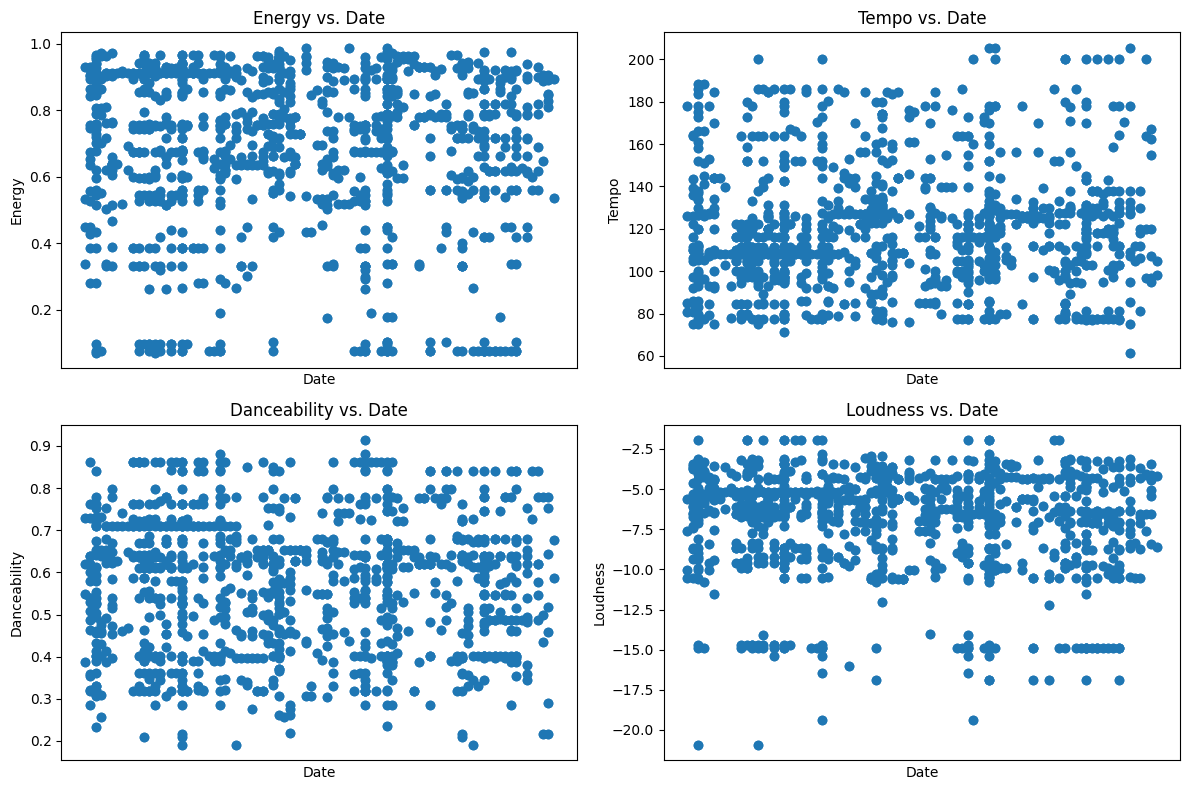

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the necessary datasets for energy and temperature
energy_dataset = merged_dataset['energy']
tempo_dataset = merged_dataset['tempo']
danceability_dataset = merged_dataset['danceability']
loudness_dataset = merged_dataset['loudness']
date = merged_dataset['date']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(date, energy_dataset, marker='o', linestyle='-')
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].set_xticks([])
axes[0, 0].set_title('Energy vs. Date')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].tick_params(axis='x', rotation=30)

axes[0, 1].scatter(date, tempo_dataset, marker='o', linestyle='-')
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].set_xticks([])
axes[0, 1].set_title('Tempo vs. Date')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Tempo')
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].tick_params(axis='x', rotation=30)

axes[1, 0].scatter(date, danceability_dataset, marker='o', linestyle='-')
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].set_xticks([])
axes[1, 0].set_title('Danceability vs. Date')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Danceability')
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].tick_params(axis='x', rotation=30)

axes[1, 1].scatter(date, loudness_dataset, marker='o', linestyle='-')
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].set_xticks([])
axes[1, 1].set_title('Loudness vs. Date')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Loudness')
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

2x2 grid visualizing different values in my data with respect to time.

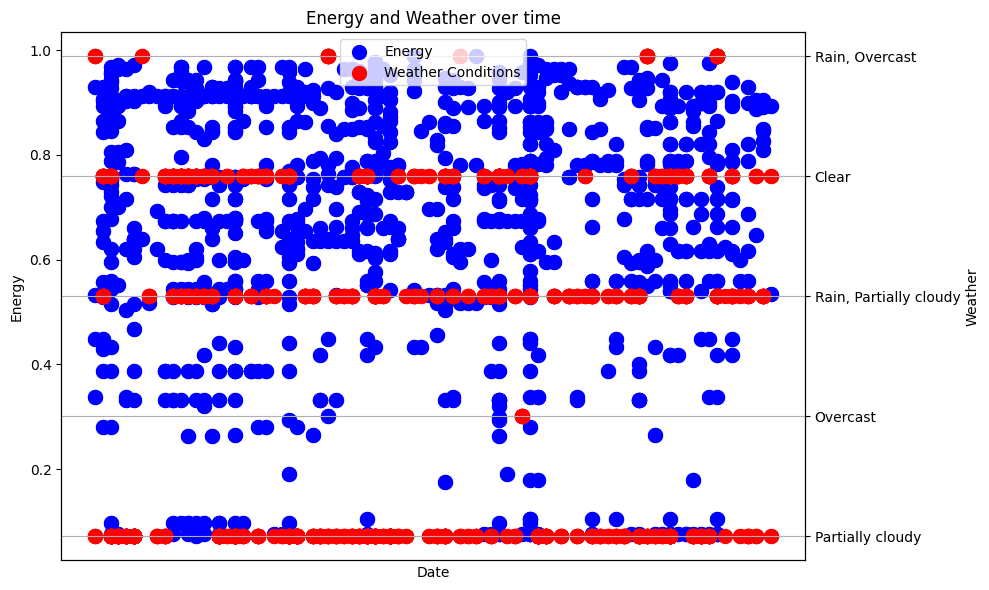

In [67]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(merged_dataset['date'], merged_dataset['energy'], marker='o', s=100, c='blue', label='Energy')
ax1.set_ylabel('Energy')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()


ax2.scatter(merged_dataset['date'], merged_dataset['conditionsEnum'], marker='o', s=100, c='red', label='Weather Conditions')
ax2.set_ylabel('Weather')

custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
custom_labels = unique_conditions_key['conditions'].tolist()
ax2.set_yticks(custom_ticks)
ax2.set_yticklabels(custom_labels)

# Add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Weather over time')
plt.tight_layout()
plt.show()

A graph with 2 ranges in respect to time. The first visualizes a songs energy. The second is the condition of the weather on that specific day. Analyzing the graph, many low energy songs are on sunny days and high enery songs are on cloudy/rainy days.

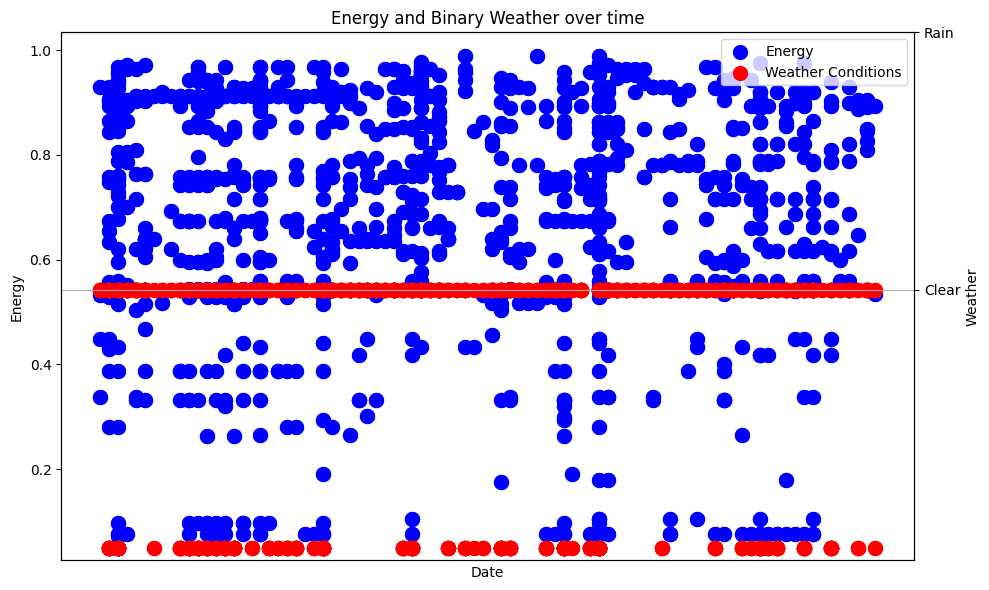

In [68]:
fig, binary_ax1 = plt.subplots(figsize=(10, 6))

binary_ax1.scatter(merged_dataset['date'], merged_dataset['energy'], marker='o', s=100, c='blue', label='Energy')
binary_ax1.set_ylabel('Energy')
binary_ax1.set_xlabel('Date')

binary_ax2 = binary_ax1.twinx()


binary_ax2.scatter(merged_dataset['date'], merged_dataset['conditionsBinary'], marker='o', s=100, c='red', label='Weather Conditions')
binary_ax2.set_ylabel('Weather')

#custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
#custom_labels = unique_conditions_key['conditions'].tolist()
binary_ax2.set_yticks([1, 2])
binary_ax2.set_yticklabels(['Clear', 'Rain'])

# Add a legend for both lines
lines1, labels1 = binary_ax1.get_legend_handles_labels()
lines2, labels2 = binary_ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Binary Weather over time')
plt.tight_layout()
plt.show()

Similar to the previous graph, the data is a the songs energy compared to the binary result of raining. This reveals a strong correlation between Low energy songs on clear days, and high energy songs on cloudy/rainy days.

Preliminary Hypothesis: Analysing the data above, I hypothesize a less than 50% correlation with the enumerated data. However, when comparing the the binary data, a stronger correlation will present itself. While not perfect, low energy songs correlate to a sunny/clear day where a high tempo song correlates to a rainy/cloudy day.

In [69]:
columns_to_drop = ['Year', 'Month', 'Day', 'time', 'trackName', 'albumName', 'artistName',
                   'playlists.name', 'track_id', 'hour', 'date', 'precipcover', 'conditions','conditionsEnum','conditionsBinary']

x = merged_dataset.drop(columns=columns_to_drop, axis=1)

x.fillna(0, inplace=True)
#x.to_csv('./cleaned_data/cleaned.csv', index=False)
y = merged_dataset['conditionsEnum']
z = merged_dataset['conditionsBinary']

display(x)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
1,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
2,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
3,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
4,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4
1990,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1991,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1992,0.678,0.535,10,-8.592,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4


Seperate the merged dataset into a train and test data. X train remains the same, while the Y and Z are different values, one being the enumerated values of the weather while the second is the binary weather.

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
a_train, a_test, b_train, b_test = train_test_split(x, z, test_size=0.2)

Create the training and test for both testing factors.

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree1 = tree.fit(x_train, y_train)
y_pred = tree1.predict(x_test)
tree2 = tree.fit(a_train, b_train)
b_pred = tree2.predict(a_test)


Using a decision tree classifier, compare the training data to the predicted data. the y predict compares the enumerated data, while the b predict compares the binary data.

In [72]:
from sklearn import metrics
print("Enumerated Accuracy:",metrics.accuracy_score(y_test, y_pred))

Enumerated Accuracy: 0.3308270676691729


In [73]:
print("Binary Accuracy:",metrics.accuracy_score(b_test, b_pred))

Binary Accuracy: 0.6416040100250626


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

Using a nearest neighbor search, the Enumerated and Binary values are predicted and compared to the original data.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train, y_train)
knn2.fit(a_train, b_train)
y_pred = knn1.predict(x_test)
b_pred = knn2.predict(a_test)

In [76]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Enumerated Accuracy:", accuracy)

Enumerated Accuracy: 0.3634085213032581


In [77]:
accuracy = metrics.accuracy_score(b_test, b_pred)
print("Binary Accuracy:", accuracy)

Binary Accuracy: 0.6240601503759399
